# Experiments with parameterisations for time trees

## Parameterise each node in terms of its height above highest child

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
heights_above_children = np.array([0.9, 1.5, 1.3, 0.8])
leaf_child_mask = np.array([[True, True],[False, True],[True, True],[False, False]])
child_indices = np.array([[0, 0], [0, 0], [0, 0], [1, 2]])

def calc_heights(heights_above_children, child_indices, leaf_child_mask):
    heights = np.zeros_like(heights_above_children)
    for i in range(len(heights)):
        heights[i] = np.max(np.where(leaf_child_mask[i], 0, heights[child_indices[i]])) + heights_above_children[i]
    return heights

heights = calc_heights(heights_above_children, child_indices, leaf_child_mask)
heights

array([0.9, 2.4, 1.3, 3.2])

In [13]:
def calc_branch_lengths(heights, child_indices, leaf_child_mask):
    return np.where(leaf_child_mask, heights[:, np.newaxis], heights[:, np.newaxis] - heights[child_indices])

calc_branch_lengths(heights, child_indices, leaf_child_mask)

array([[0.9, 0.9],
       [1.5, 2.4],
       [1.3, 1.3],
       [0.8, 1.9]])

In [16]:
def test_func(height_above_child):
    heights_above_children_modified = np.copy(heights_above_children)
    heights_above_children_modified[2] = height_above_child
    heights = calc_heights(heights_above_children_modified, child_indices, leaf_child_mask)
    return calc_branch_lengths(heights, child_indices, leaf_child_mask)[3, 1]

test_func(1.3)

1.9000000000000001

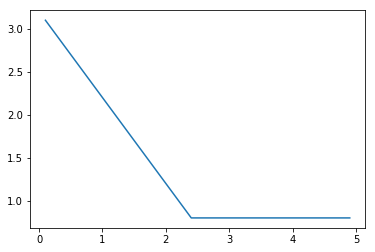

In [18]:
xs = np.arange(0.1, 5.0, 0.1)
plt.plot(xs, [test_func(x) for x in xs])